In [1]:
%load_ext autoreload
%autoreload 2

import numpy as np
import pandas as pd
import matplotlib

import matplotlib.pyplot as plt
%matplotlib inline

import src.adtk.detector as detector
import src.adtk.transformer as transformer
import src.adtk.aggregator as aggregator
from src.adtk.visualization import plot

# -------------------- 1. Single Series --------------------

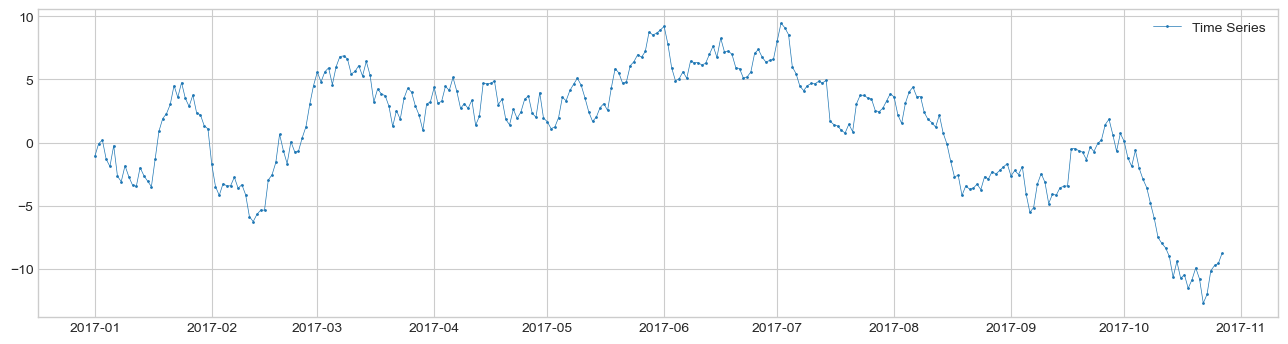

In [60]:
rand = np.random.RandomState(123)
s = pd.Series(np.cumsum(rand.normal(size=300)), index=pd.date_range(start="2017-1-1", periods=300, freq="D"))
plot(s);

### ---------- 1.1 Single Series, 一个检测器 ----------

2017-01-01    False
2017-01-02    False
2017-01-03    False
2017-01-04    False
2017-01-05    False
              ...  
2017-10-23     True
2017-10-24     True
2017-10-25     True
2017-10-26     True
2017-10-27     True
Freq: D, Length: 300, dtype: bool


D:\company\project\adtk\src\adtk\data\_data.py:164: FutureWarning: iteritems is deprecated and will be removed in a future version. Use .items instead.
  for t, v in time_window_end_series.iteritems():  # type: pd.Timestamp, int


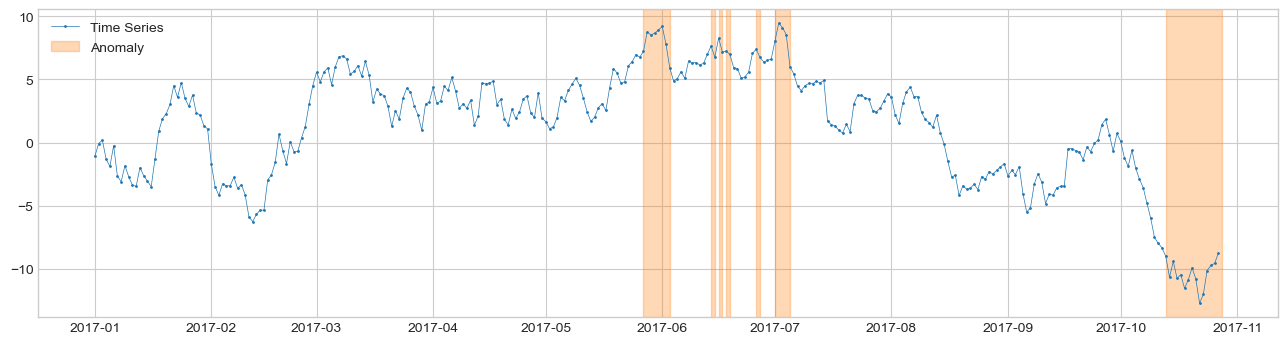

In [6]:
anomaly = detector.QuantileAD(low=0.05, high=0.95).fit_detect(s, return_list=False)
print(anomaly)
plot(s, anomaly);

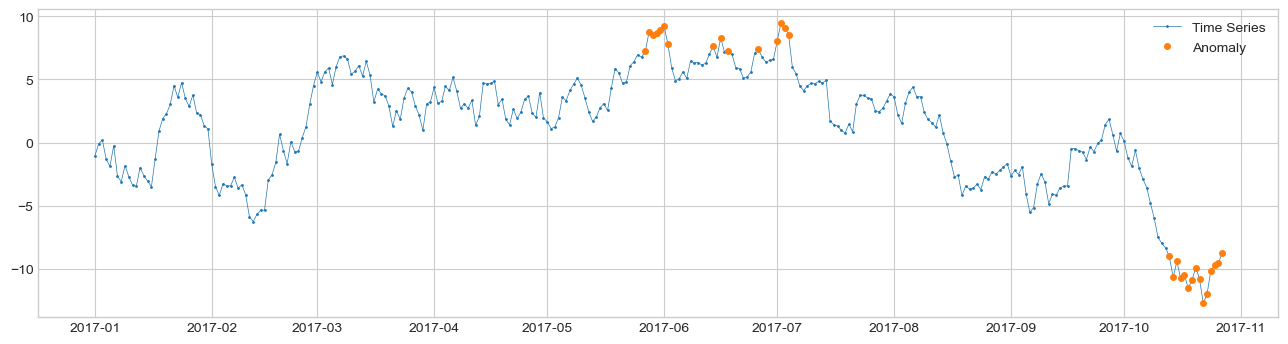

In [7]:
anomaly = detector.QuantileAD(low=0.05, high=0.95).fit_detect(s, return_list=False)
plot(s, anomaly, anomaly_tag="marker");

D:\company\project\adtk\src\adtk\data\_data.py:164: FutureWarning: iteritems is deprecated and will be removed in a future version. Use .items instead.
  for t, v in time_window_end_series.iteritems():  # type: pd.Timestamp, int


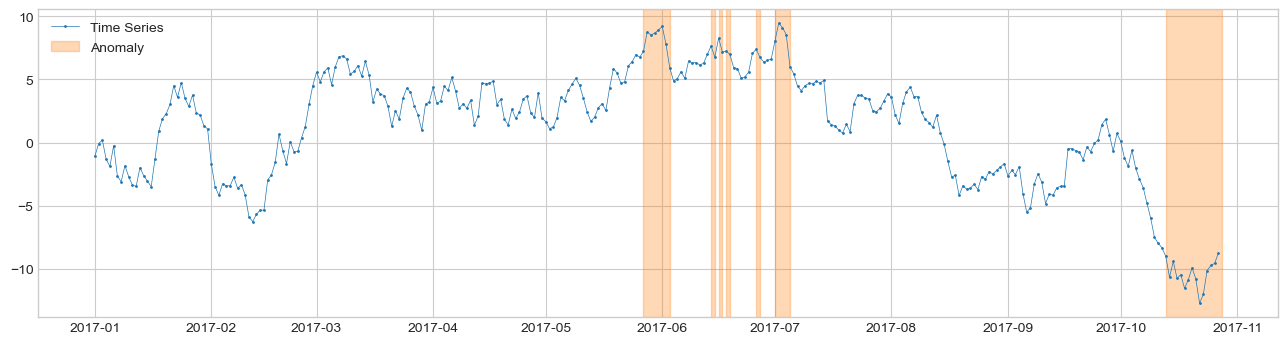

In [8]:
anomaly = detector.QuantileAD(low=0.05, high=0.95).fit_detect(s, return_list=True)
plot(s, anomaly);

D:\company\project\adtk\src\adtk\data\_data.py:164: FutureWarning: iteritems is deprecated and will be removed in a future version. Use .items instead.
  for t, v in time_window_end_series.iteritems():  # type: pd.Timestamp, int


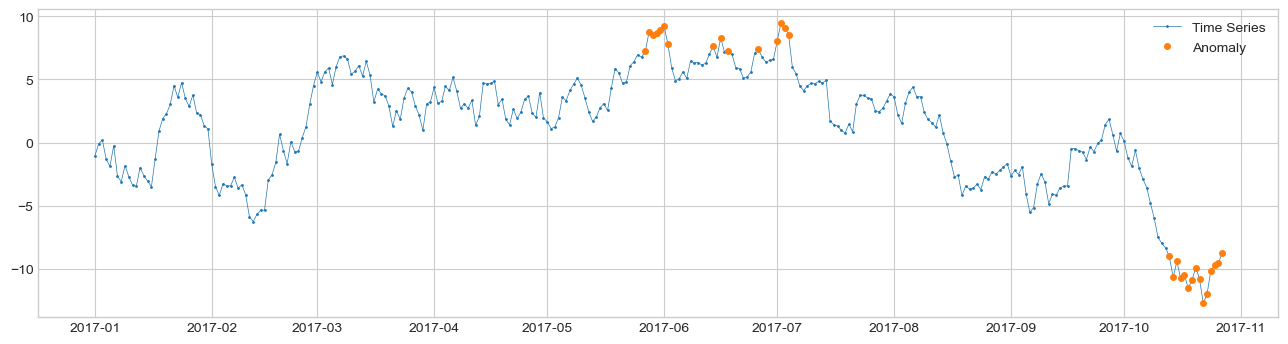

In [9]:
anomaly = detector.QuantileAD(low=0.05, high=0.95).fit_detect(s, return_list=True)
plot(s, anomaly, anomaly_tag="marker");

D:\company\project\adtk\src\adtk\data\_data.py:164: FutureWarning: iteritems is deprecated and will be removed in a future version. Use .items instead.
  for t, v in time_window_end_series.iteritems():  # type: pd.Timestamp, int


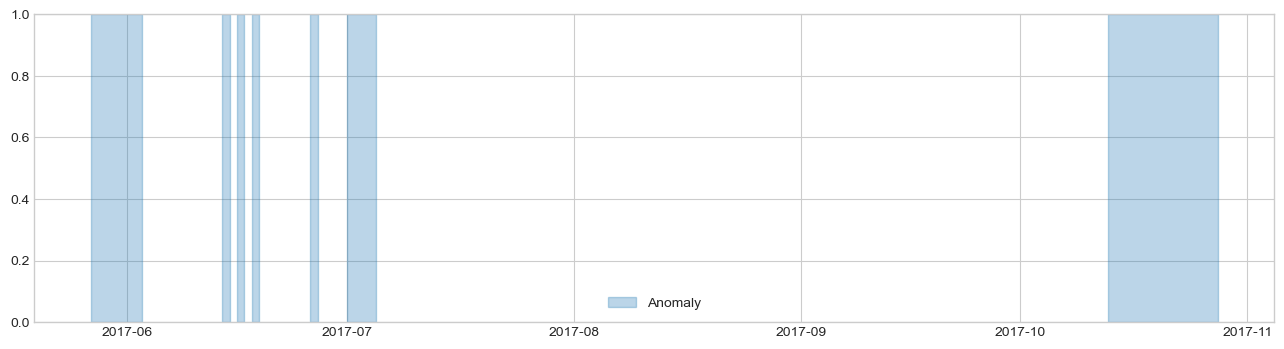

In [10]:
plot(None, anomaly);

### ---------- 1.2 Single Series, 多个检测器 ----------

In [61]:
low = detector.QuantileAD(low=0.05).fit_detect(s, return_list=True)
high = detector.QuantileAD(high=0.95).fit_detect(s, return_list=True)
anomaly = {"low": low, "high": high}
anomaly

{'low': [(Timestamp('2017-10-13 00:00:00', freq='D'),
   Timestamp('2017-10-27 23:59:59.999999999', freq='D'))],
 'high': [(Timestamp('2017-05-27 00:00:00', freq='D'),
   Timestamp('2017-06-02 23:59:59.999999999', freq='D')),
  (Timestamp('2017-06-14 00:00:00', freq='D'),
   Timestamp('2017-06-14 23:59:59.999999999', freq='D')),
  (Timestamp('2017-06-16 00:00:00', freq='D'),
   Timestamp('2017-06-16 23:59:59.999999999', freq='D')),
  (Timestamp('2017-06-18 00:00:00', freq='D'),
   Timestamp('2017-06-18 23:59:59.999999999', freq='D')),
  (Timestamp('2017-06-26 00:00:00', freq='D'),
   Timestamp('2017-06-26 23:59:59.999999999', freq='D')),
  (Timestamp('2017-07-01 00:00:00', freq='D'),
   Timestamp('2017-07-04 23:59:59.999999999', freq='D'))]}

D:\company\project\adtk\src\adtk\data\_data.py:164: FutureWarning: iteritems is deprecated and will be removed in a future version. Use .items instead.
  for t, v in time_window_end_series.iteritems():  # type: pd.Timestamp, int
D:\company\project\adtk\src\adtk\data\_data.py:164: FutureWarning: iteritems is deprecated and will be removed in a future version. Use .items instead.
  for t, v in time_window_end_series.iteritems():  # type: pd.Timestamp, int


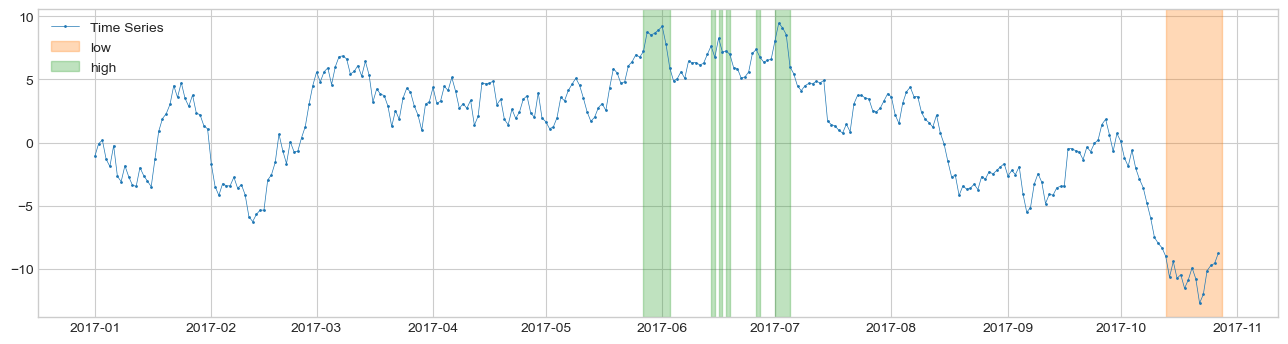

In [62]:
plot(s, anomaly);

D:\company\project\adtk\src\adtk\data\_data.py:164: FutureWarning: iteritems is deprecated and will be removed in a future version. Use .items instead.
  for t, v in time_window_end_series.iteritems():  # type: pd.Timestamp, int
D:\company\project\adtk\src\adtk\data\_data.py:164: FutureWarning: iteritems is deprecated and will be removed in a future version. Use .items instead.
  for t, v in time_window_end_series.iteritems():  # type: pd.Timestamp, int


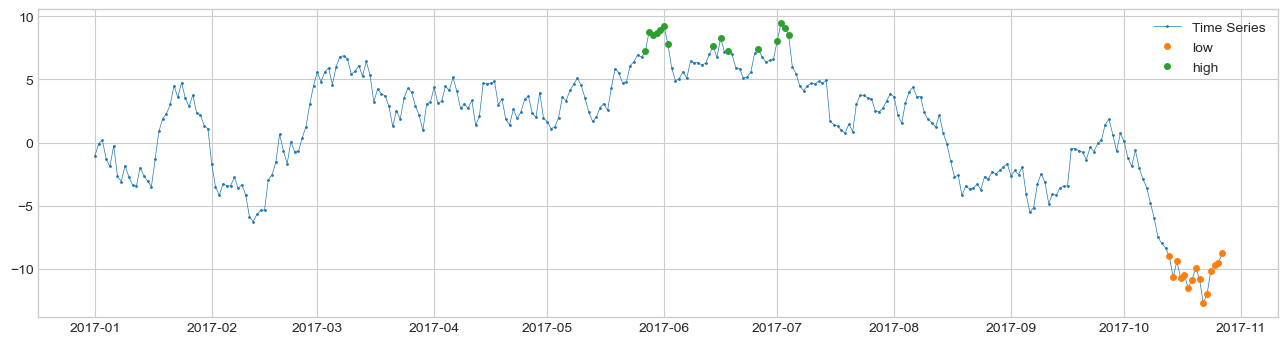

In [63]:
plot(s, anomaly, anomaly_tag="marker");

In [65]:
low = detector.QuantileAD(low=0.05).fit_detect(s, return_list=False)
high = detector.QuantileAD(high=0.95).fit_detect(s, return_list=False)
anomaly = {"low": low, "high": high}
anomaly

{'low': 2017-01-01    False
 2017-01-02    False
 2017-01-03    False
 2017-01-04    False
 2017-01-05    False
               ...  
 2017-10-23     True
 2017-10-24     True
 2017-10-25     True
 2017-10-26     True
 2017-10-27     True
 Freq: D, Length: 300, dtype: bool,
 'high': 2017-01-01    False
 2017-01-02    False
 2017-01-03    False
 2017-01-04    False
 2017-01-05    False
               ...  
 2017-10-23    False
 2017-10-24    False
 2017-10-25    False
 2017-10-26    False
 2017-10-27    False
 Freq: D, Length: 300, dtype: bool}

In [ ]:
plot(s, anomaly);

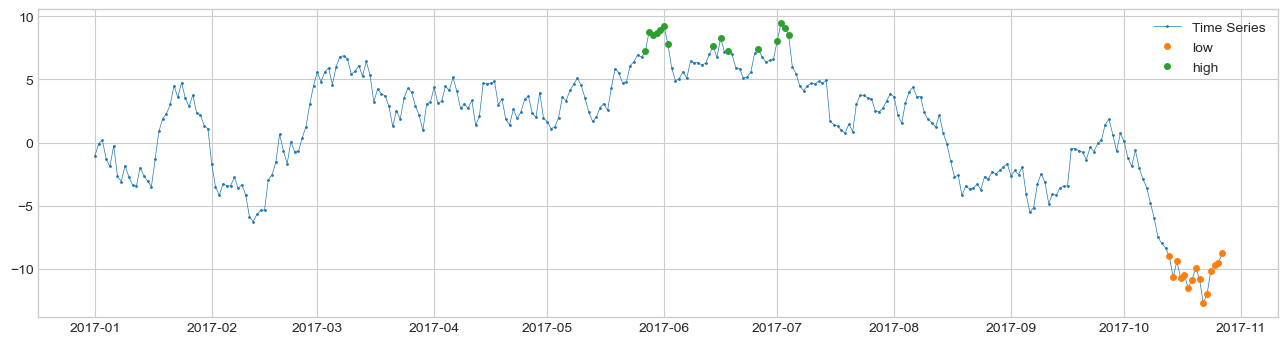

In [15]:
plot(s, anomaly, anomaly_tag="marker");

D:\company\project\adtk\src\adtk\data\_data.py:164: FutureWarning: iteritems is deprecated and will be removed in a future version. Use .items instead.
  for t, v in time_window_end_series.iteritems():  # type: pd.Timestamp, int
D:\company\project\adtk\src\adtk\data\_data.py:164: FutureWarning: iteritems is deprecated and will be removed in a future version. Use .items instead.
  for t, v in time_window_end_series.iteritems():  # type: pd.Timestamp, int


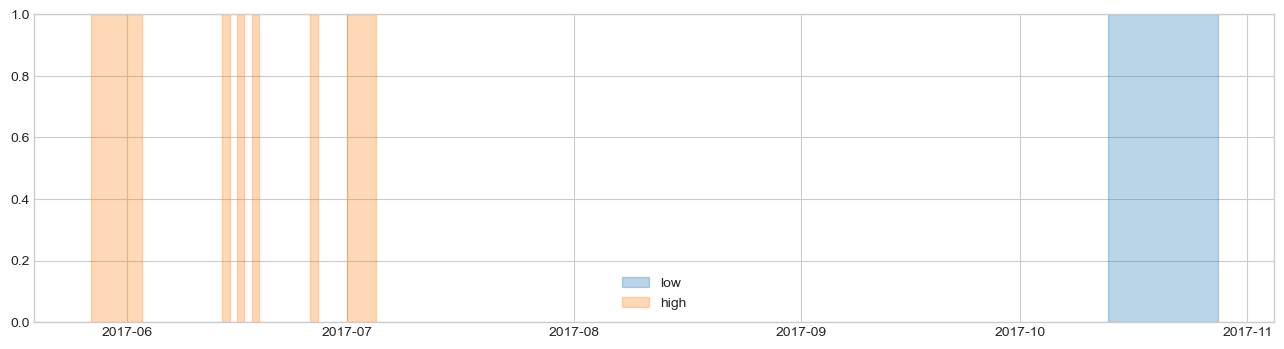

In [16]:
# plot(None, anomaly);

# -------------------- 2. Multiple Series --------------------

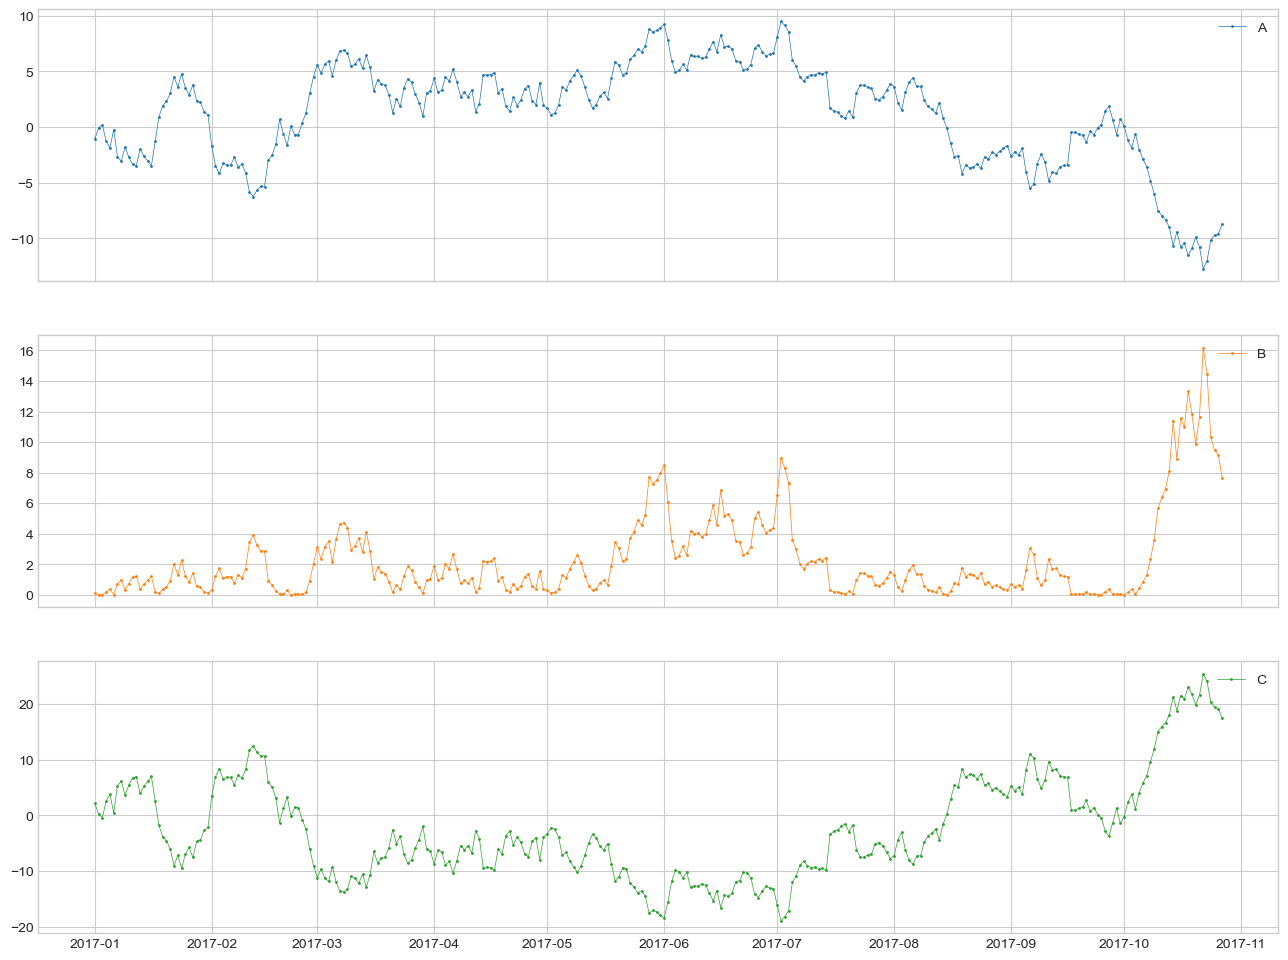

In [20]:
df = pd.concat([s.rename('A'), (s**2/10).rename("B"), (-s*2).rename("C")], axis=1)
plot(df);

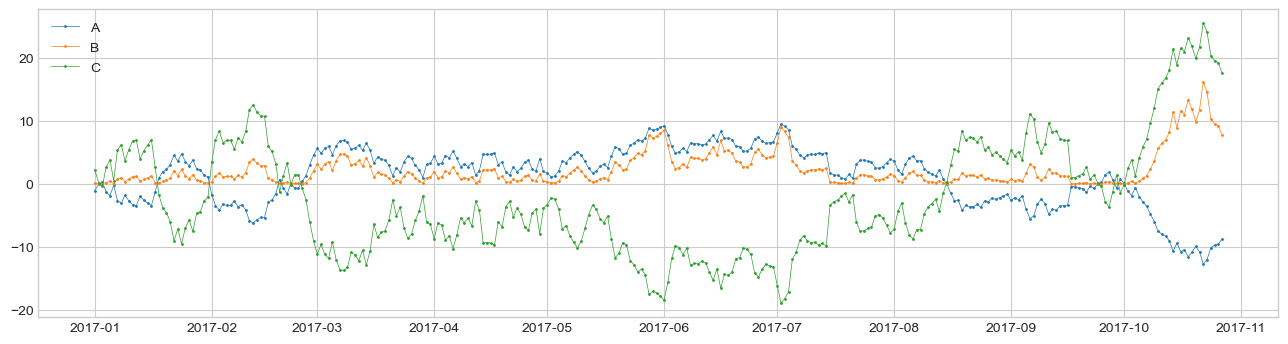

In [21]:
plot(df, curve_group='all');

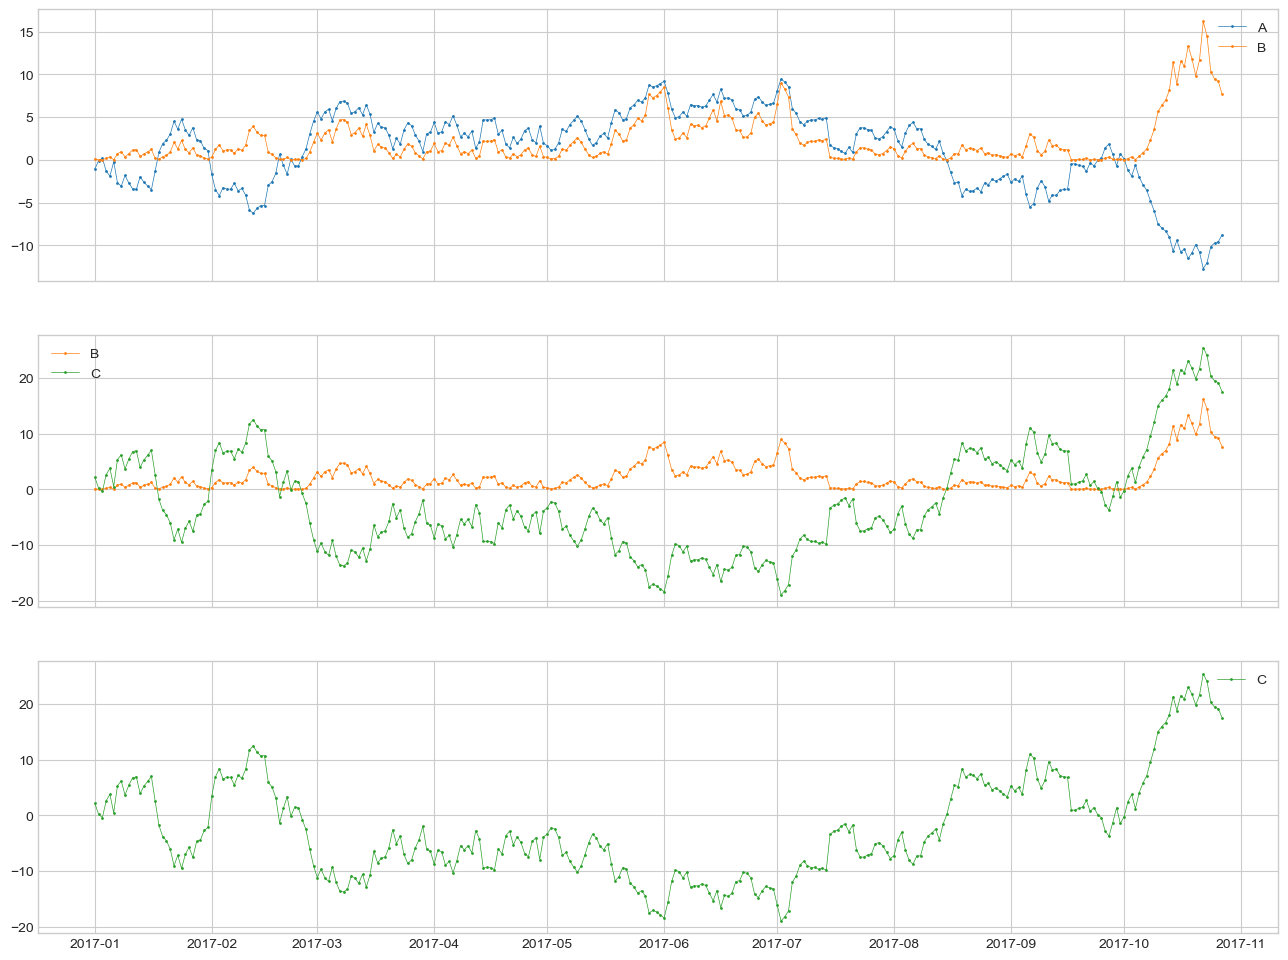

In [22]:
plot(df, curve_group=[["A", "B"], ["B", "C"], "C"]);

### ---------- 2.1 Multiple Series, 所有序列综合一起检测 ----------

D:\company\project\adtk\src\adtk\data\_data.py:164: FutureWarning: iteritems is deprecated and will be removed in a future version. Use .items instead.
  for t, v in time_window_end_series.iteritems():  # type: pd.Timestamp, int


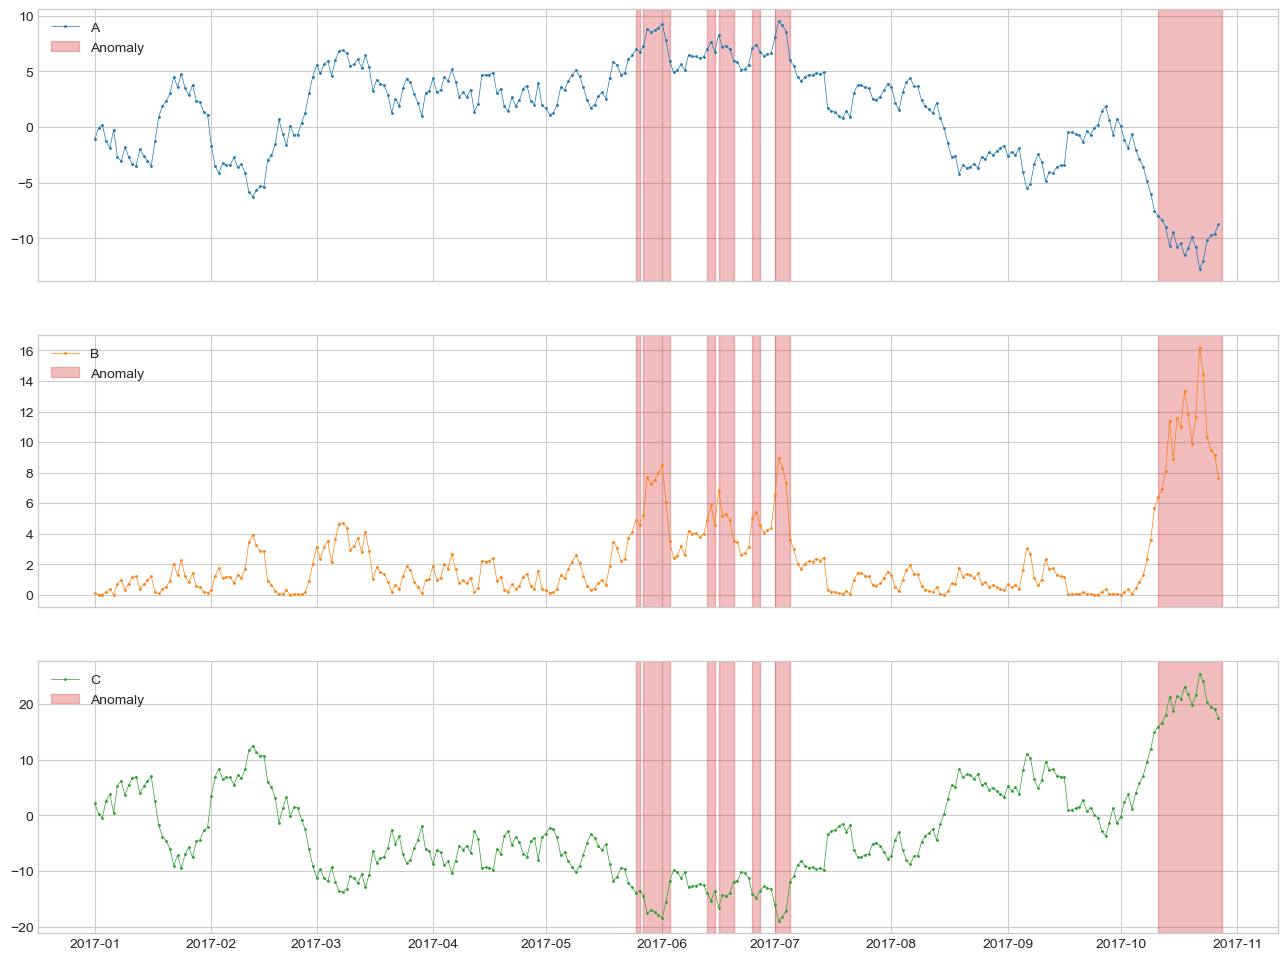

In [48]:
anomaly = detector.PcaAD(k=1, c=1).fit_detect(df)
plot(df, anomaly);

In [49]:
# plot(df, anomaly, anomaly_tag="marker");

D:\company\project\adtk\src\adtk\data\_data.py:164: FutureWarning: iteritems is deprecated and will be removed in a future version. Use .items instead.
  for t, v in time_window_end_series.iteritems():  # type: pd.Timestamp, int


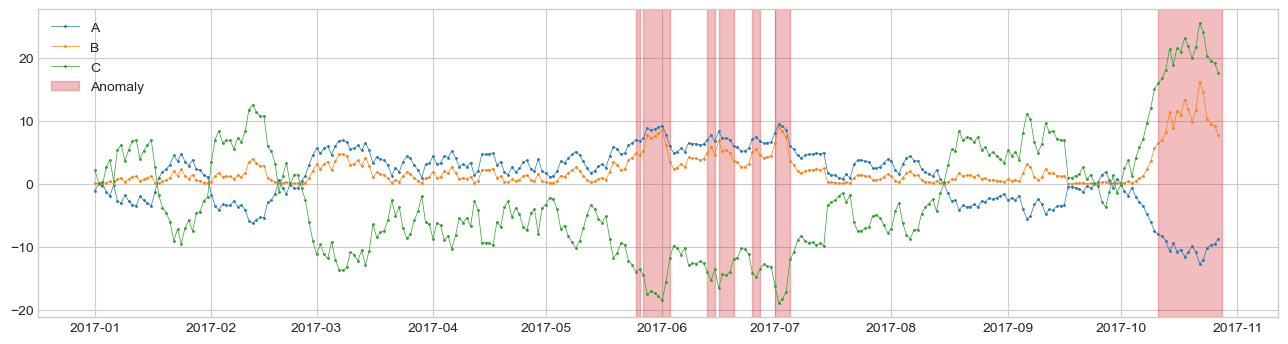

In [50]:
plot(df, anomaly, curve_group="all");

### ---------- 2.2 Multiple Series, 每个序列单独检测，每个序列使用相同的检测器（一种或多种） ----------

#### 2.2.1 一种

In [31]:
anomaly = detector.ThresholdAD(low=-10, high=15).detect(df)
anomaly

,A,B,C
2017-01-01,False,False,False
2017-01-02,False,False,False
2017-01-03,False,False,False
2017-01-04,False,False,False
2017-01-05,False,False,False
...,...,...,...
2017-10-23,True,False,True
2017-10-24,True,False,True
2017-10-25,False,False,True
2017-10-26,False,False,True


D:\company\project\adtk\src\adtk\data\_data.py:164: FutureWarning: iteritems is deprecated and will be removed in a future version. Use .items instead.
  for t, v in time_window_end_series.iteritems():  # type: pd.Timestamp, int
D:\company\project\adtk\src\adtk\data\_data.py:164: FutureWarning: iteritems is deprecated and will be removed in a future version. Use .items instead.
  for t, v in time_window_end_series.iteritems():  # type: pd.Timestamp, int
D:\company\project\adtk\src\adtk\data\_data.py:164: FutureWarning: iteritems is deprecated and will be removed in a future version. Use .items instead.
  for t, v in time_window_end_series.iteritems():  # type: pd.Timestamp, int


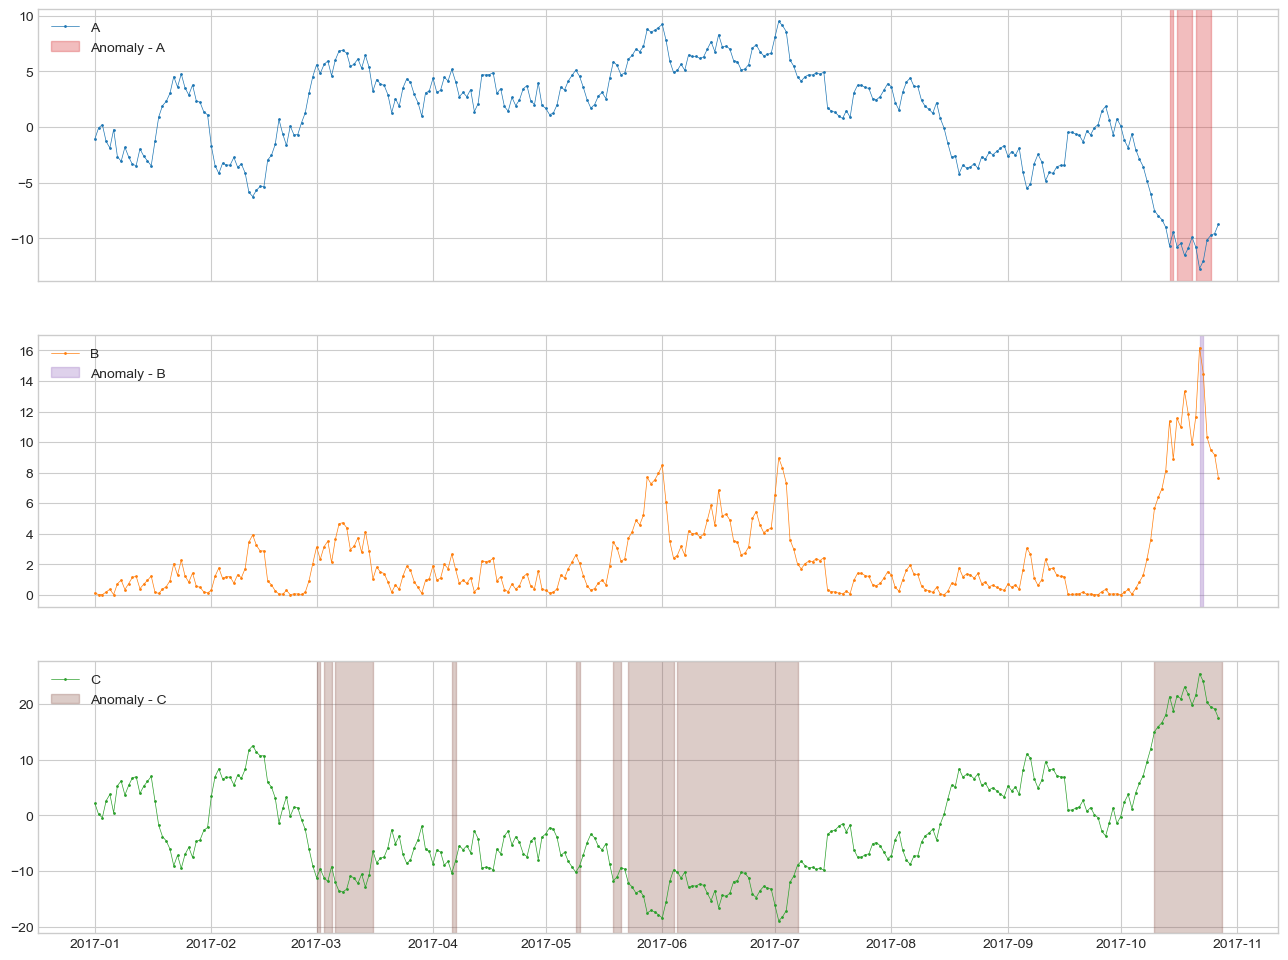

In [32]:
plot(df, anomaly);

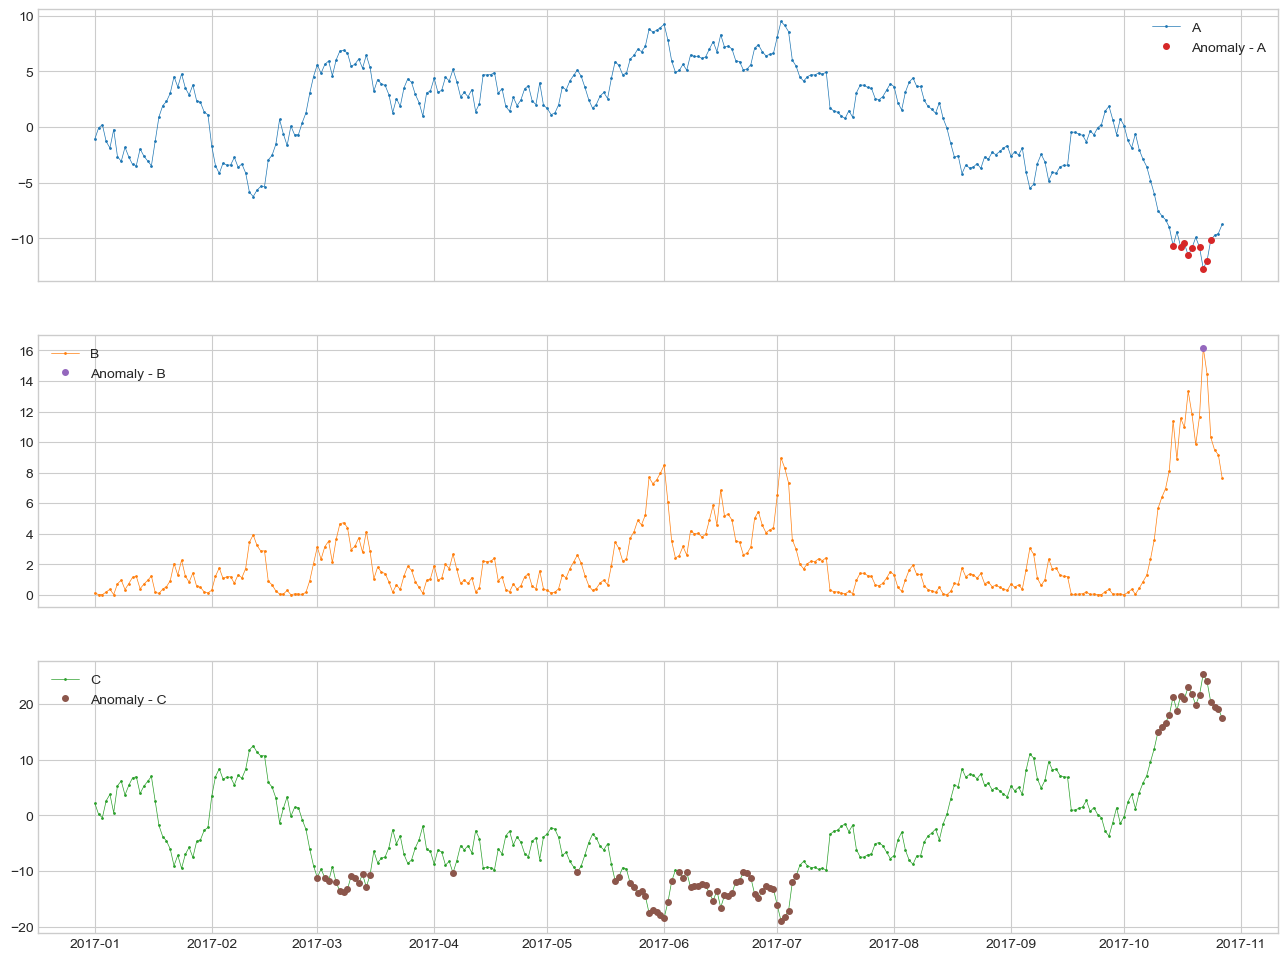

In [33]:
plot(df, anomaly, anomaly_tag="marker");

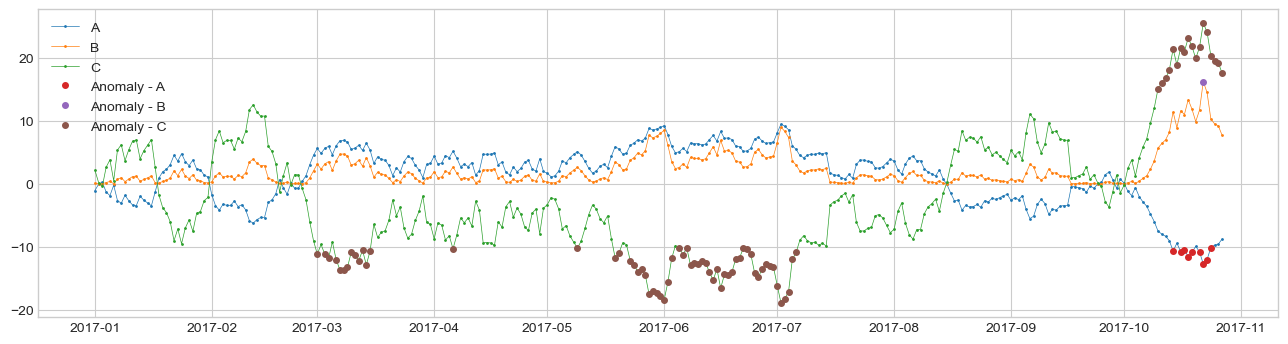

In [34]:
plot(df, anomaly, curve_group="all", anomaly_tag="marker");

#### 2.2.2 多种

##### a

In [35]:
anomaly = {
    "low": detector.QuantileAD(low=0.1).fit_detect(df),
    "high": detector.QuantileAD(high=0.9).fit_detect(df)
}
anomaly

{'low':                 A      B      C
 2017-01-01  False   True  False
 2017-01-02  False   True  False
 2017-01-03  False   True  False
 2017-01-04  False  False  False
 2017-01-05  False  False  False
 ...           ...    ...    ...
 2017-10-23   True  False  False
 2017-10-24   True  False  False
 2017-10-25   True  False  False
 2017-10-26   True  False  False
 2017-10-27   True  False  False
 
 [300 rows x 3 columns],
 'high':                 A      B      C
 2017-01-01  False  False  False
 2017-01-02  False  False  False
 2017-01-03  False  False  False
 2017-01-04  False  False  False
 2017-01-05  False  False  False
 ...           ...    ...    ...
 2017-10-23  False   True   True
 2017-10-24  False   True   True
 2017-10-25  False   True   True
 2017-10-26  False   True   True
 2017-10-27  False   True   True
 
 [300 rows x 3 columns]}

D:\company\project\adtk\src\adtk\data\_data.py:164: FutureWarning: iteritems is deprecated and will be removed in a future version. Use .items instead.
  for t, v in time_window_end_series.iteritems():  # type: pd.Timestamp, int
D:\company\project\adtk\src\adtk\data\_data.py:164: FutureWarning: iteritems is deprecated and will be removed in a future version. Use .items instead.
  for t, v in time_window_end_series.iteritems():  # type: pd.Timestamp, int
D:\company\project\adtk\src\adtk\data\_data.py:164: FutureWarning: iteritems is deprecated and will be removed in a future version. Use .items instead.
  for t, v in time_window_end_series.iteritems():  # type: pd.Timestamp, int
D:\company\project\adtk\src\adtk\data\_data.py:164: FutureWarning: iteritems is deprecated and will be removed in a future version. Use .items instead.
  for t, v in time_window_end_series.iteritems():  # type: pd.Timestamp, int
D:\company\project\adtk\src\adtk\data\_data.py:164: FutureWarning: iteritems is depr

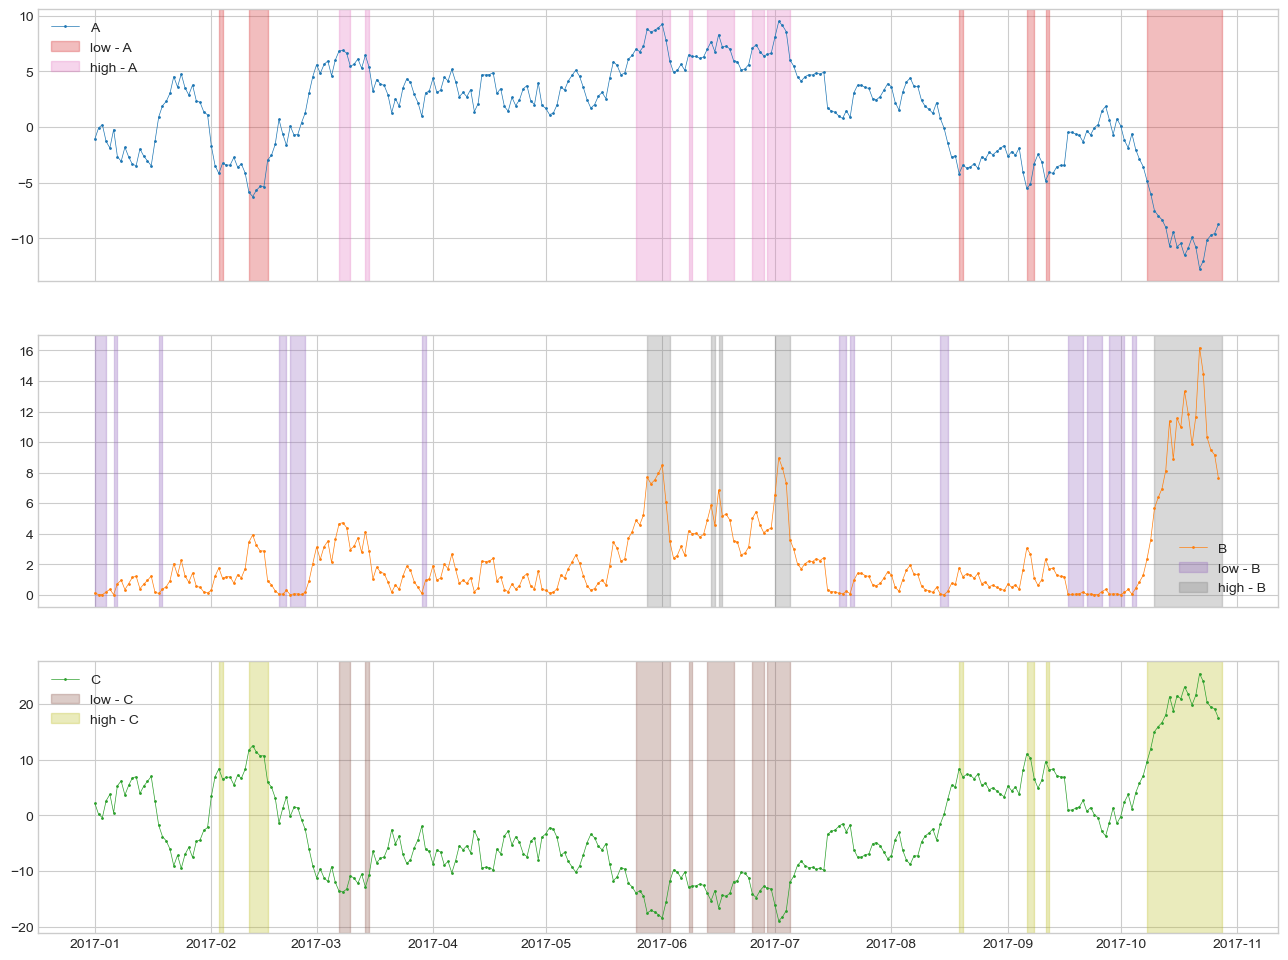

In [36]:
plot(df, anomaly);

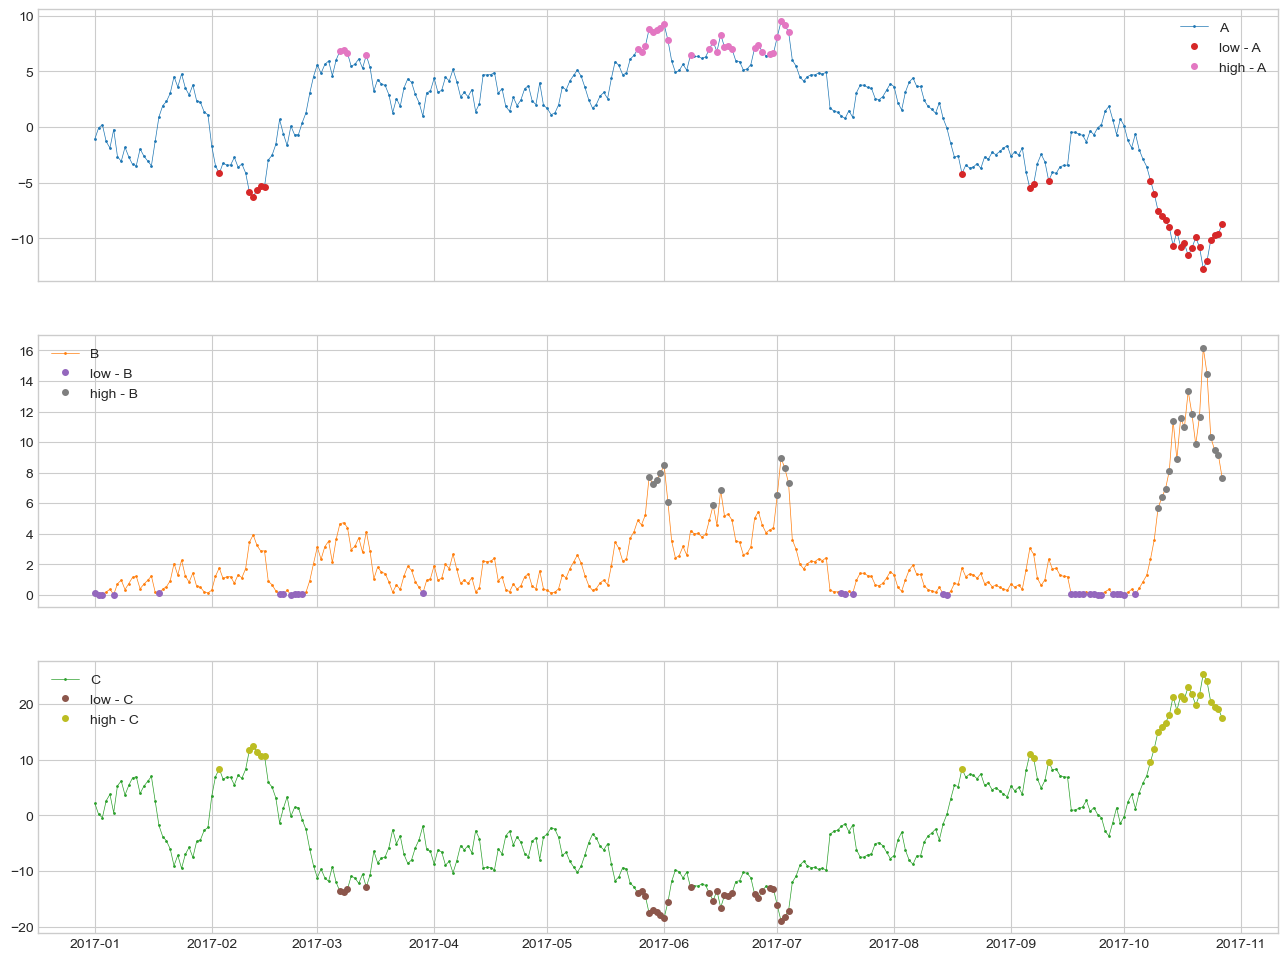

In [37]:
plot(df, anomaly, anomaly_tag="marker");

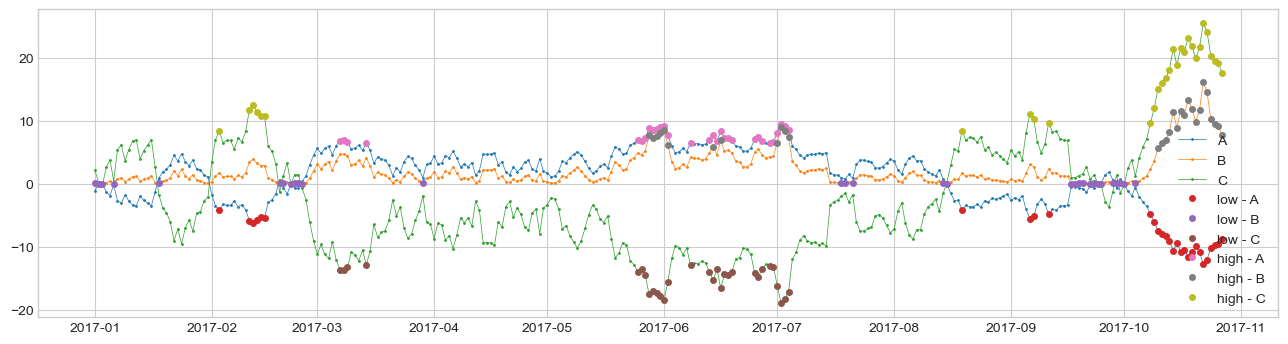

In [39]:
plot(df, anomaly, curve_group="all", anomaly_tag="marker");

In [40]:
# plot(None, anomaly);

##### b

In [53]:
anomaly = {
    "low": detector.QuantileAD(low=0.1).fit_detect(df),
    "high": detector.QuantileAD(high=0.9).fit_detect(df),
    "pca": detector.PcaAD(k=1).fit_detect(df)
}
anomaly

{'low':                 A      B      C
 2017-01-01  False   True  False
 2017-01-02  False   True  False
 2017-01-03  False   True  False
 2017-01-04  False  False  False
 2017-01-05  False  False  False
 ...           ...    ...    ...
 2017-10-23   True  False  False
 2017-10-24   True  False  False
 2017-10-25   True  False  False
 2017-10-26   True  False  False
 2017-10-27   True  False  False
 
 [300 rows x 3 columns],
 'high':                 A      B      C
 2017-01-01  False  False  False
 2017-01-02  False  False  False
 2017-01-03  False  False  False
 2017-01-04  False  False  False
 2017-01-05  False  False  False
 ...           ...    ...    ...
 2017-10-23  False   True   True
 2017-10-24  False   True   True
 2017-10-25  False   True   True
 2017-10-26  False   True   True
 2017-10-27  False   True   True
 
 [300 rows x 3 columns],
 'pca': 2017-01-01    False
 2017-01-02    False
 2017-01-03    False
 2017-01-04    False
 2017-01-05    False
               ...  
 2017-

D:\company\project\adtk\src\adtk\data\_data.py:164: FutureWarning: iteritems is deprecated and will be removed in a future version. Use .items instead.
  for t, v in time_window_end_series.iteritems():  # type: pd.Timestamp, int
D:\company\project\adtk\src\adtk\data\_data.py:164: FutureWarning: iteritems is deprecated and will be removed in a future version. Use .items instead.
  for t, v in time_window_end_series.iteritems():  # type: pd.Timestamp, int
D:\company\project\adtk\src\adtk\data\_data.py:164: FutureWarning: iteritems is deprecated and will be removed in a future version. Use .items instead.
  for t, v in time_window_end_series.iteritems():  # type: pd.Timestamp, int
D:\company\project\adtk\src\adtk\data\_data.py:164: FutureWarning: iteritems is deprecated and will be removed in a future version. Use .items instead.
  for t, v in time_window_end_series.iteritems():  # type: pd.Timestamp, int
D:\company\project\adtk\src\adtk\data\_data.py:164: FutureWarning: iteritems is depr

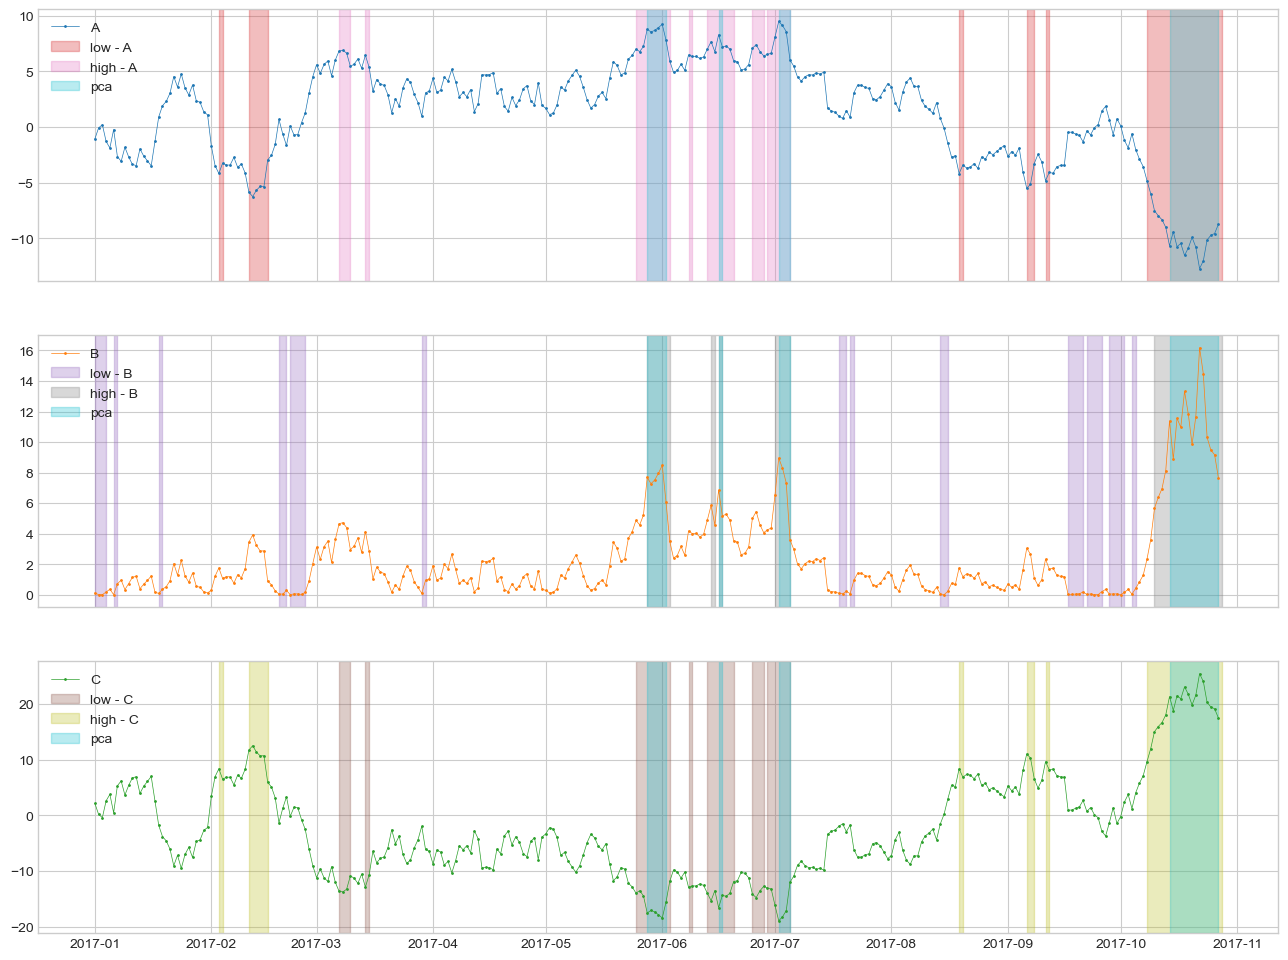

In [54]:
plot(df, anomaly);

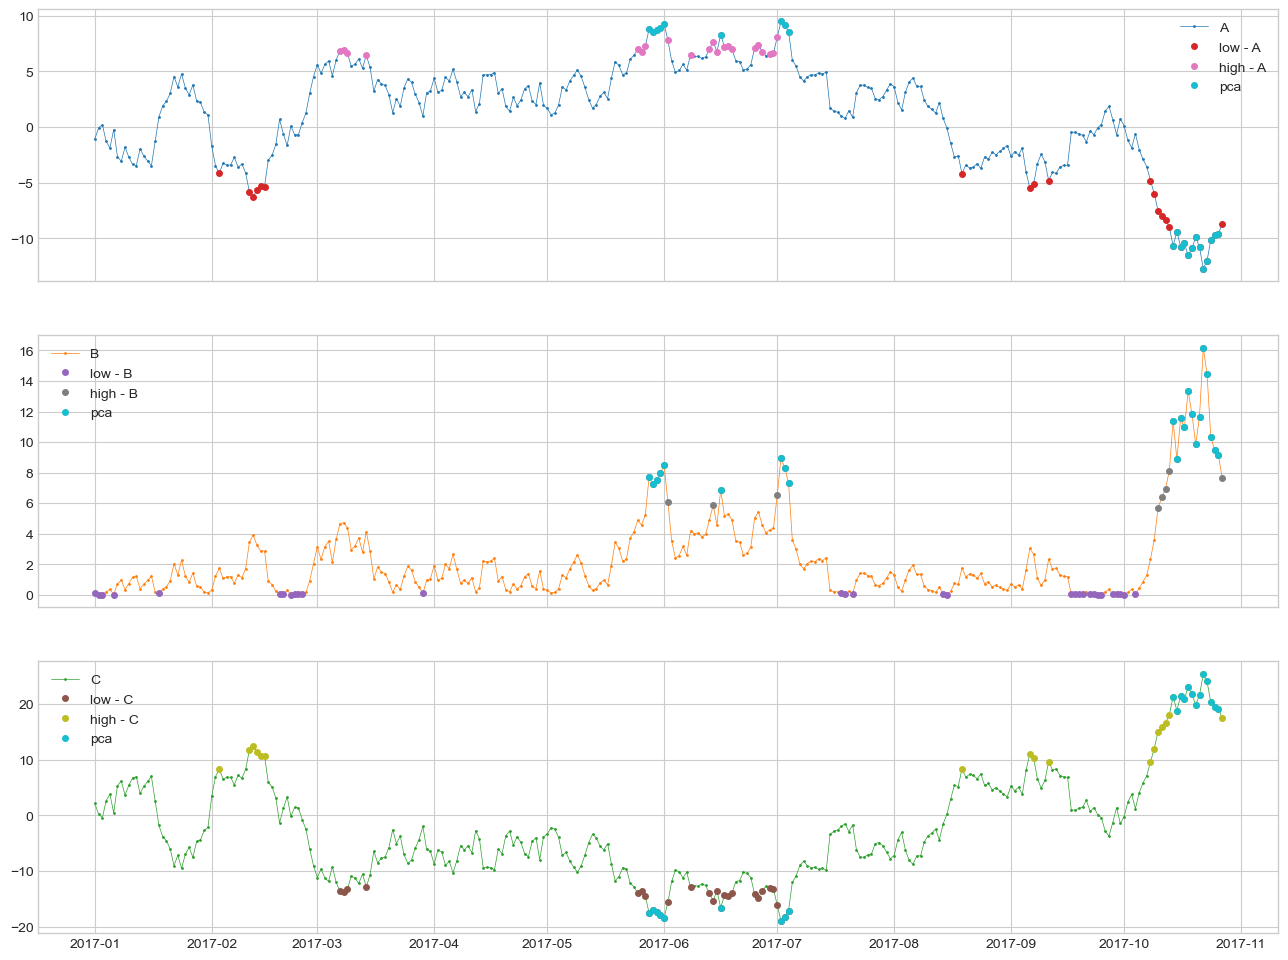

In [55]:
plot(df, anomaly, anomaly_tag="marker");

D:\company\project\adtk\src\adtk\data\_data.py:164: FutureWarning: iteritems is deprecated and will be removed in a future version. Use .items instead.
  for t, v in time_window_end_series.iteritems():  # type: pd.Timestamp, int


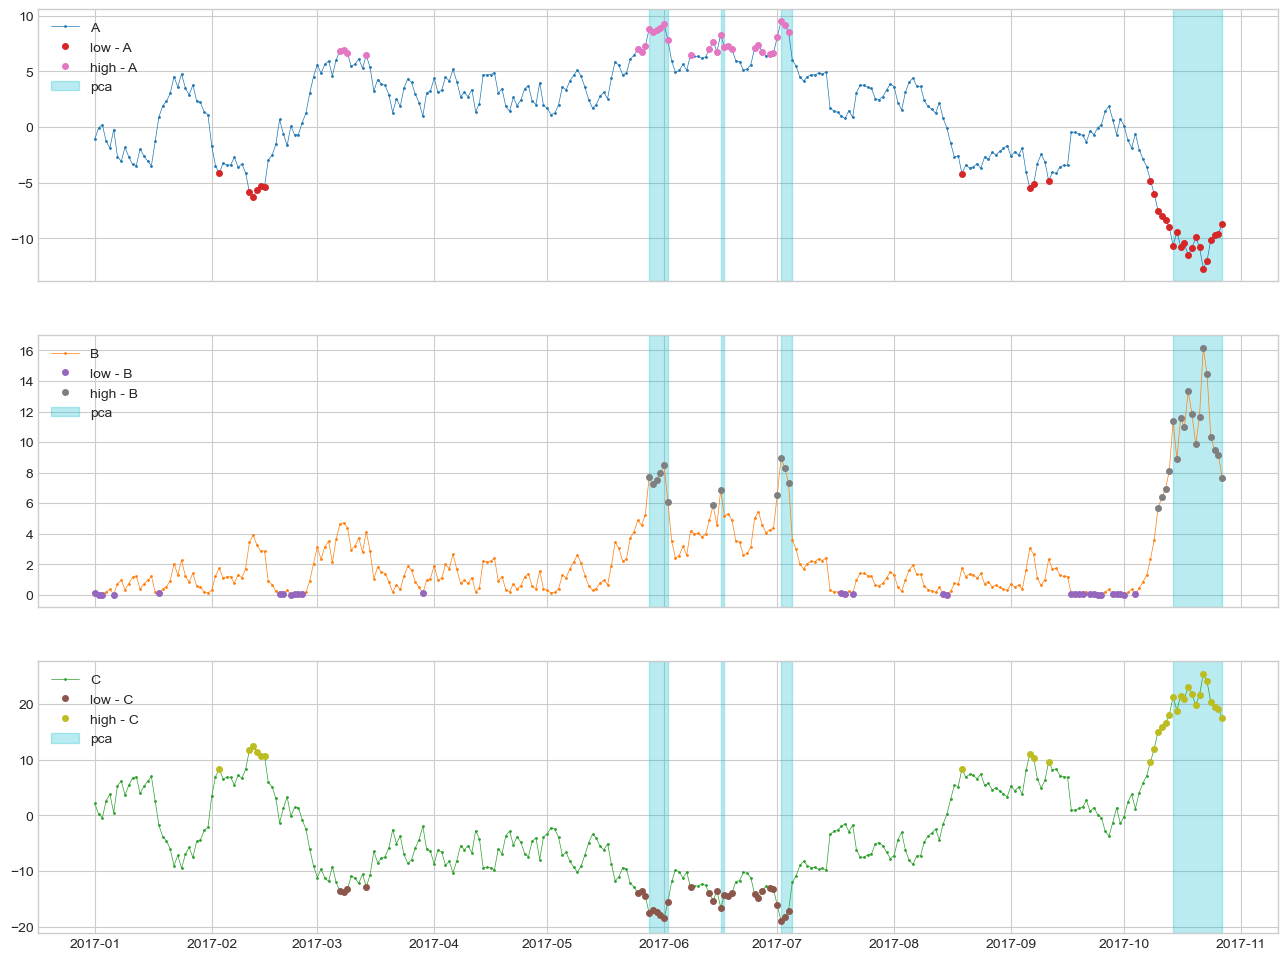

In [56]:
plot(df, anomaly, anomaly_tag={"low":"marker", "high":"marker"});

D:\company\project\adtk\src\adtk\data\_data.py:164: FutureWarning: iteritems is deprecated and will be removed in a future version. Use .items instead.
  for t, v in time_window_end_series.iteritems():  # type: pd.Timestamp, int


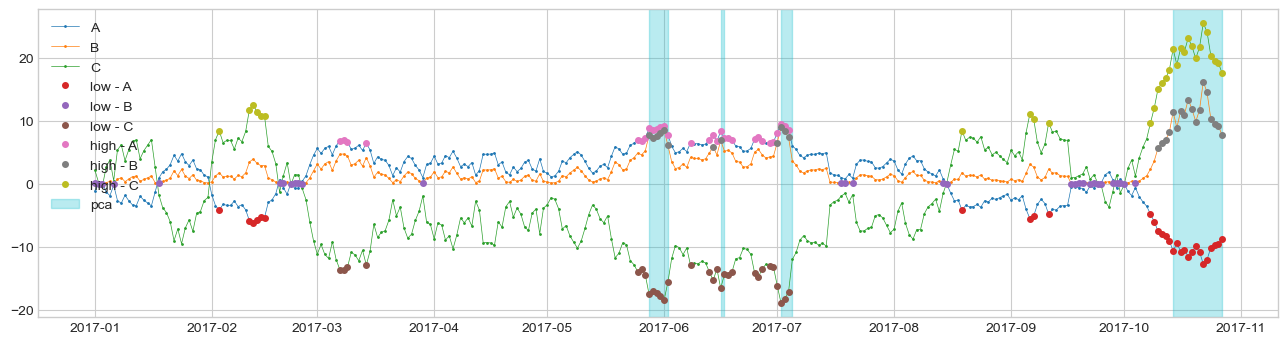

In [58]:
plot(df, anomaly, curve_group="all", anomaly_tag={"low":"marker", "high":"marker"});

D:\company\project\adtk\src\adtk\data\_data.py:164: FutureWarning: iteritems is deprecated and will be removed in a future version. Use .items instead.
  for t, v in time_window_end_series.iteritems():  # type: pd.Timestamp, int


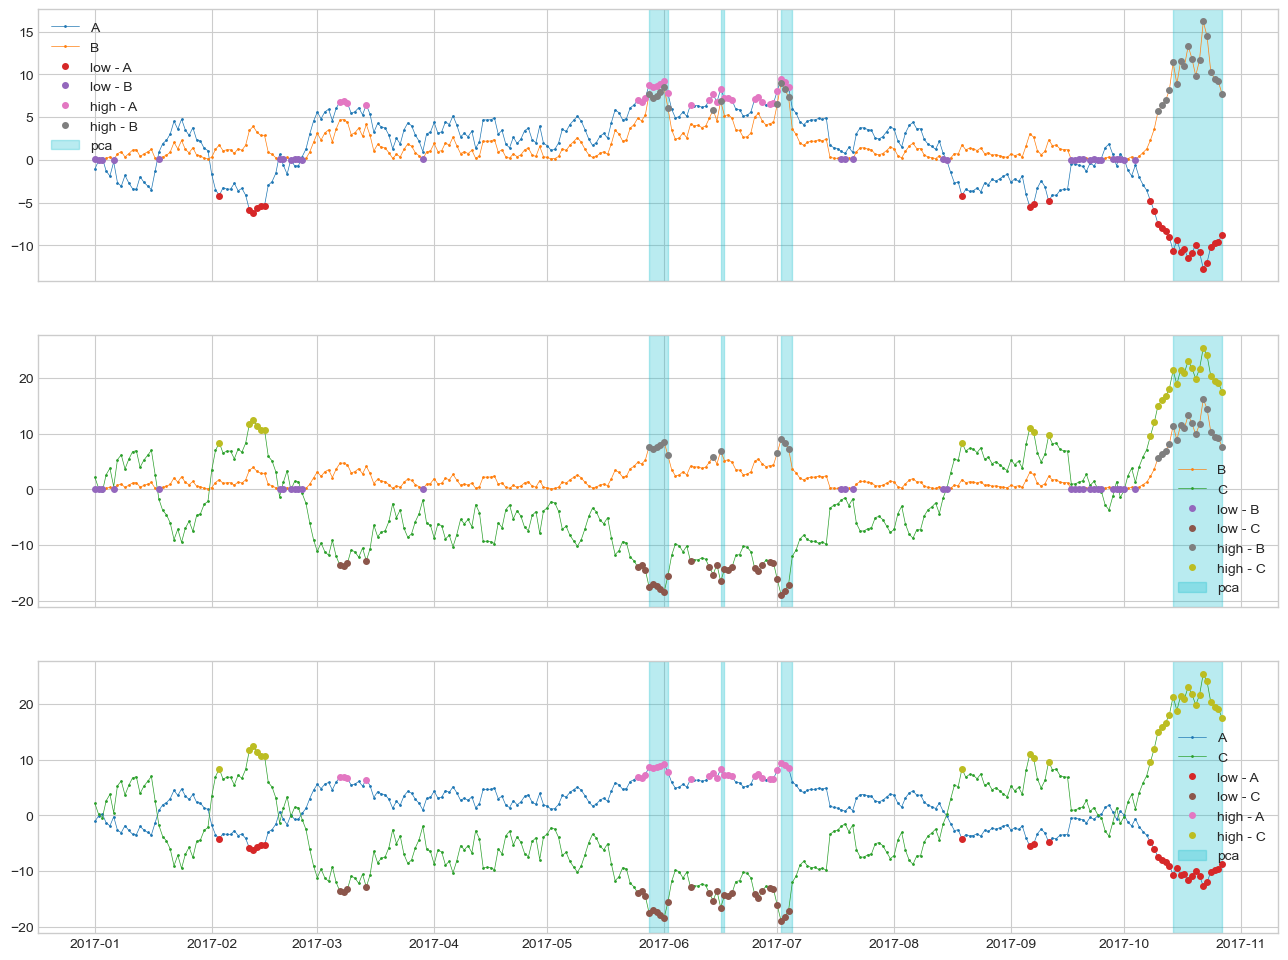

In [57]:
plot(df, anomaly, curve_group=[("A", "B"), ("B", "C"), ("C", "A")], anomaly_tag={"low":"marker", "high":"marker"});

In [47]:
# plot(None, anomaly);

# -------------------- 3. Multiple Series，每个序列单独检测，每个序列使用不同的检测器 --------------------

[<AxesSubplot:>]

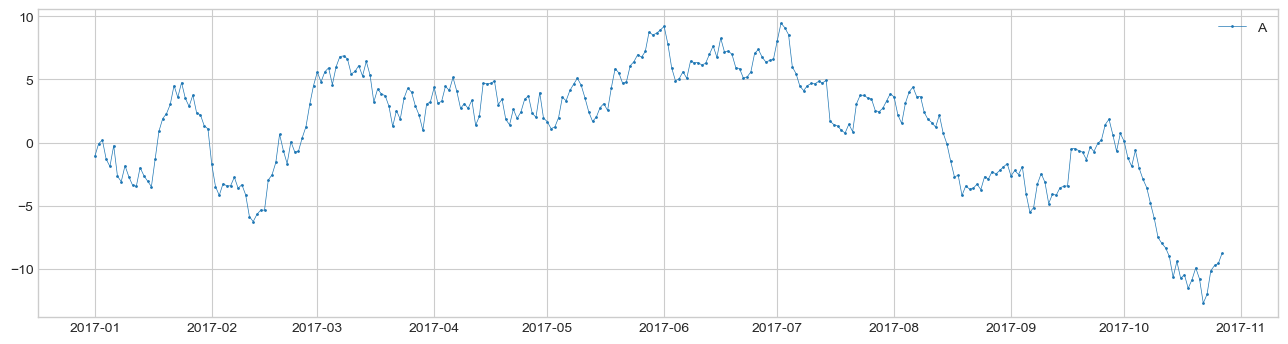

In [87]:
rand = np.random.RandomState(123)
a = pd.Series(np.cumsum(rand.normal(size=300)), index=pd.date_range(start="2017-1-1", periods=300, freq="D")).rename('A')
plot(a)

[<AxesSubplot:>]

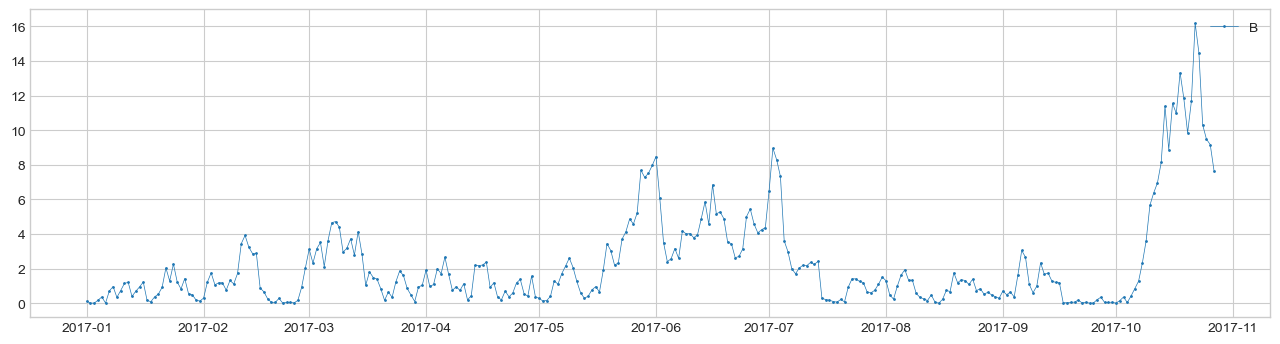

In [89]:
b = (s**2/10).rename("B")
plot(b)

[<AxesSubplot:>]

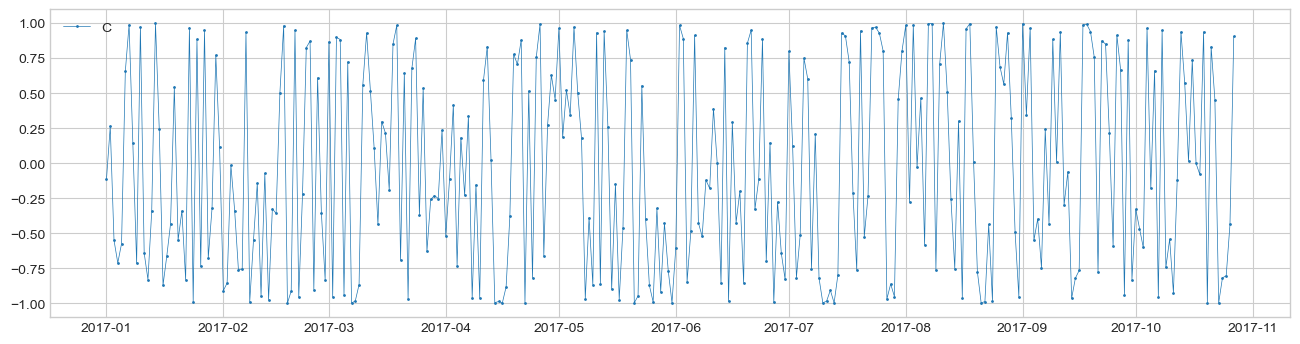

In [90]:
import math
c = (-s*3).apply(math.sin).rename("C")
plot(c)

array([<AxesSubplot:>, <AxesSubplot:>, <AxesSubplot:>], dtype=object)

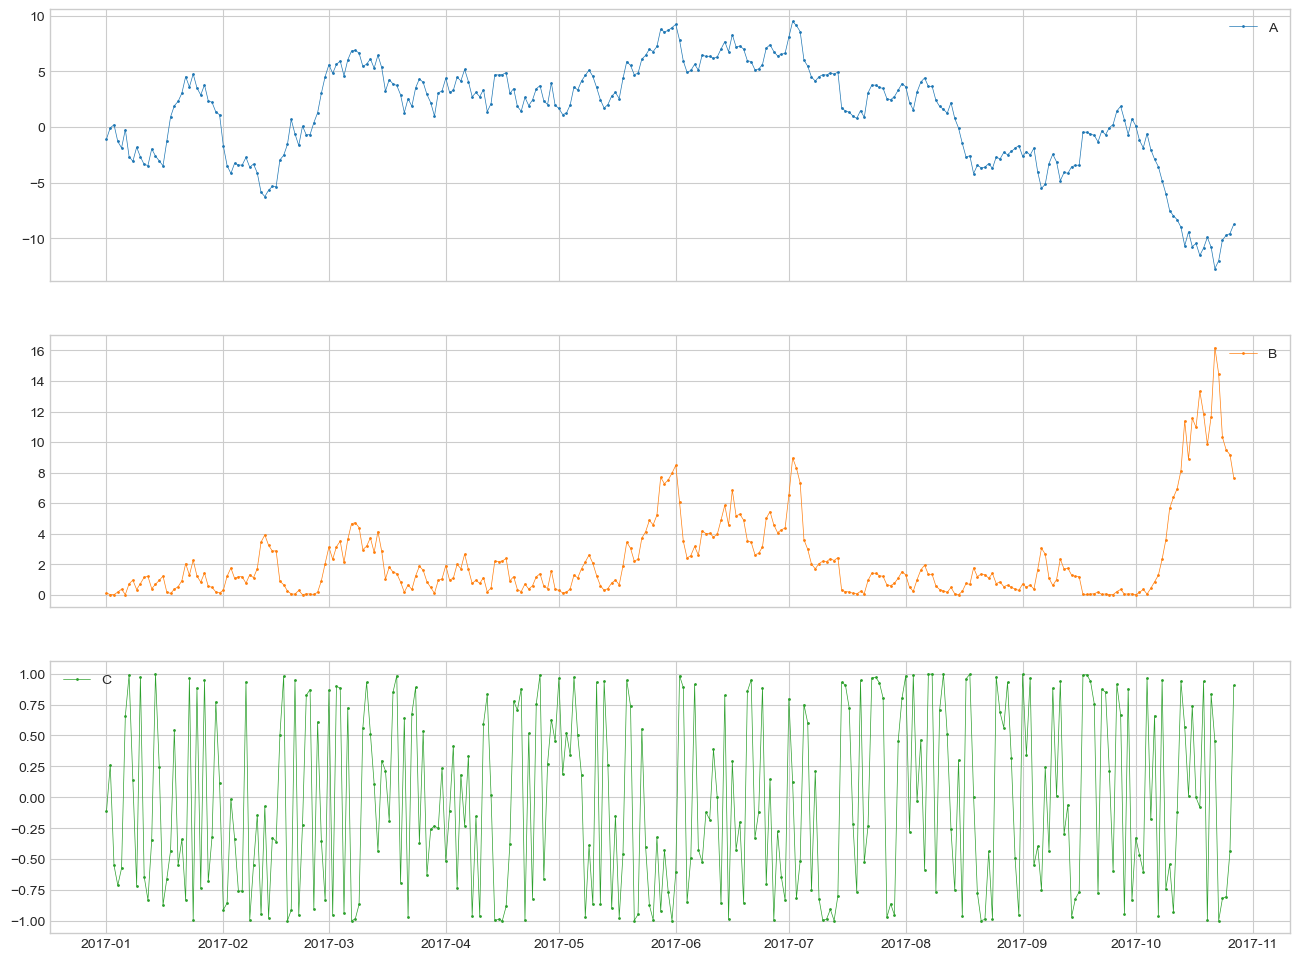

In [91]:
df = pd.concat([a, b, c], axis=1)
plot(df)

# -------------------- 4. plot函数的参数 --------------------

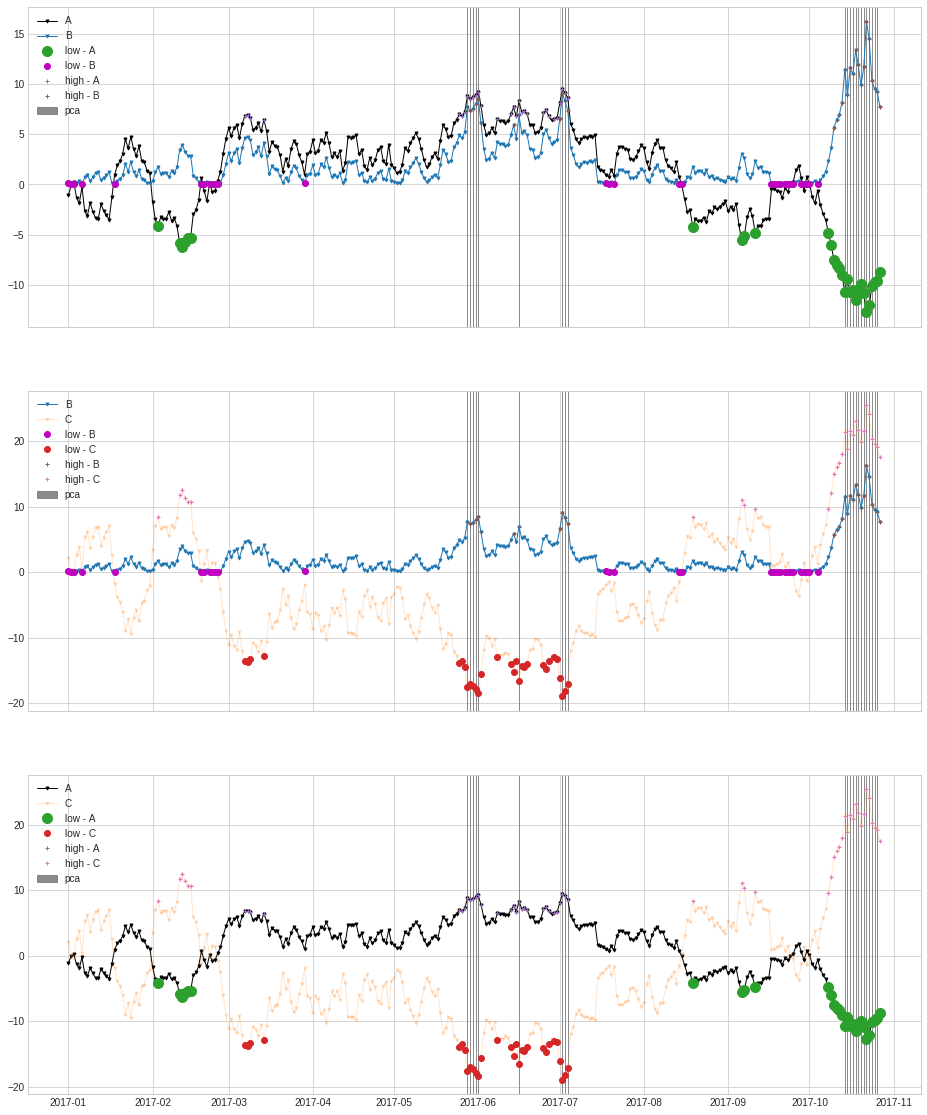

In [30]:
plot(df, anomaly, curve_group=[("A", "B"), ("B", "C"), ("C", "A")],
     ts_linewidth=1,
     ts_marker='v',
     ts_markersize=3,
     ts_alpha={"C": 0.2},
     ts_color={"A":"k"},
     anomaly_tag={"low":"marker", "high":"marker"},
     anomaly_color={"low":{"B":"m"}},
     anomaly_alpha=0.9,
     anomaly_marker={"high":"+"},
     anomaly_markersize={"low":{"A": 10}},
     freq_as_period=False,
     figsize=(16, 20)
    );

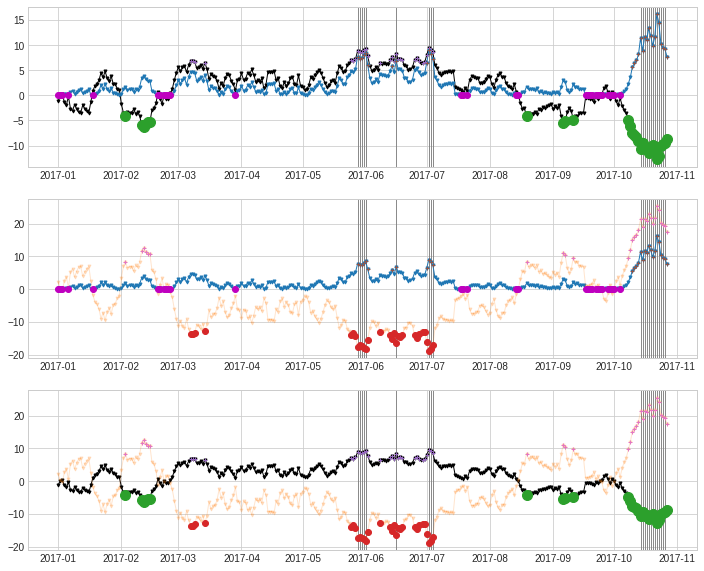

In [31]:
f, axes = plt.subplots(nrows=3, figsize=(12,10))
plot(df, anomaly, curve_group=[("A", "B"), ("B", "C"), ("C", "A")],
     ts_linewidth=1,
     ts_marker='v',
     ts_markersize=3,
     ts_alpha={"C": 0.2},
     ts_color={"A":"k"},
     anomaly_tag={"low":"marker", "high":"marker"},
     anomaly_color={"low":{"B":"m"}},
     anomaly_alpha=0.9,
     anomaly_marker={"high":"+"},
     anomaly_markersize={"low":{"A": 10}},
     freq_as_period=False,
     axes=axes,
     legend=False
    );

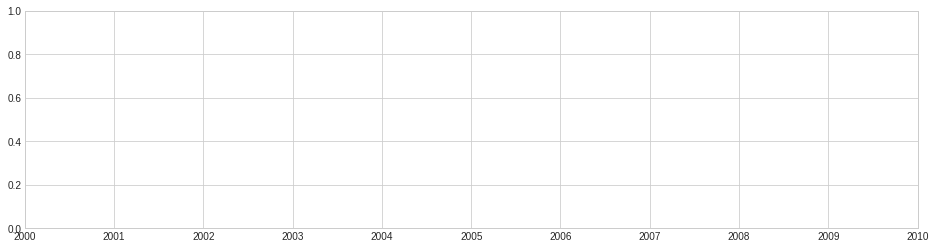

In [32]:
plot();